In [5]:
import numpy as np
x=np.array(range(0,5000))/100
y=x*(x-50)*(-x/2500-1./50)

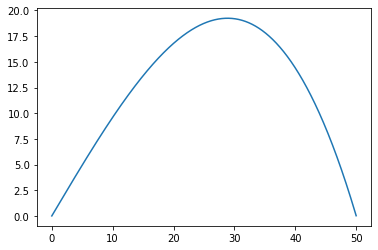

In [7]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()
plt.close()

In [25]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from scipy.io import loadmat
from scipy.io import savemat
import numpy as np
import torch.utils.data as data_utils

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [29]:
m=loadmat('d:/datasets/ILSVRC2016/imagenet.mat')
x=torch.tensor(m['data'], dtype=torch.float)
y=torch.tensor(m['targets'].T)

In [23]:
labels[0:50000:3]=1

In [32]:
from torch.utils.data import DataLoader
print(x.shape,y.shape)
x,y = x.to(device),y.to(device)
dataset=data_utils.TensorDataset(x,y)
train_loader = DataLoader(dataset, batch_size=512, shuffle=True, num_workers=0)

torch.Size([50000, 3, 32, 32]) torch.Size([50000, 1])


In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [33]:
import torch.optim as optim

net=Net()
net=net.to(device)
#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.000)

losses=[]
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        
        labels=torch.squeeze(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        #print(outputs.shape)
        loss=F.cross_entropy(outputs, labels.long())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if epoch%10==9:        
        losses.append(running_loss)
    print('[%d]  loss: %.3f' % (epoch + 1,  running_loss))

[1]  loss: 1.394
[2]  loss: 0.000
[3]  loss: 0.000
[4]  loss: 0.000
[5]  loss: 0.000
[6]  loss: 0.000
[7]  loss: 0.000
[8]  loss: 0.000
[9]  loss: 0.000
[10]  loss: 0.000
